**Q1. What is the relationship between polynomial functions and kernel functions in machine learning algorithms?**

In machine learning algorithms, the relationship between polynomial functions and kernel functions is centered around their shared goal of transforming data to higher-dimensional spaces. These transformations are crucial for dealing with non-linear relationships in the data and enhancing the performance of various algorithms, most notably Support Vector Machines (SVMs).

**Polynomial Functions:**
Polynomial functions involve raising variables to integer powers and summing these terms to create a new, higher-dimensional representation of the data. For instance, a simple polynomial transformation might take a 2D data point `[x1, x2]` and map it to `[x1^2, x2^2, x1*x2]`. This expansion captures non-linear relationships that might not be apparent in the original feature space.

**Kernel Functions:**
Kernel functions, on the other hand, measure the similarity between pairs of data points in the original feature space. They are essential for algorithms that involve comparing data points, such as SVMs. The kernel trick is a key concept here. It allows us to compute the dot product (similarity) between two data points in a higher-dimensional space without actually transforming the data explicitly.

**The Relationship:**
The relationship between polynomial functions and kernel functions becomes evident when discussing the polynomial kernel. The polynomial kernel calculates the similarity between two data points in a higher-dimensional space defined by a polynomial transformation. Mathematically, the polynomial kernel computes `(gamma * <x, y> + coef0)^degree`, where `x` and `y` are data points, and `gamma`, `coef0`, and `degree` are parameters.

In simpler terms, the polynomial kernel provides a way to implicitly achieve the effects of a polynomial transformation without the need to compute the transformed features explicitly. This is immensely advantageous, as high-degree polynomial transformations can quickly lead to an explosion in the number of features, causing computational challenges and potential overfitting. Instead, the kernel function encapsulates the essence of the transformation by measuring how similar two data points would be if transformed into the higher-dimensional space.

In summary, the relationship between polynomial functions and kernel functions lies in the fact that certain kernel functions, such as the polynomial kernel, enable machine learning algorithms like SVMs to work effectively with polynomial transformations. The kernel functions provide a way to capture the essence of these transformations without the computational burden of explicitly calculating the transformed features. This relationship strikes a balance between harnessing the power of higher-dimensional representations and maintaining computational efficiency.

score : 0.9


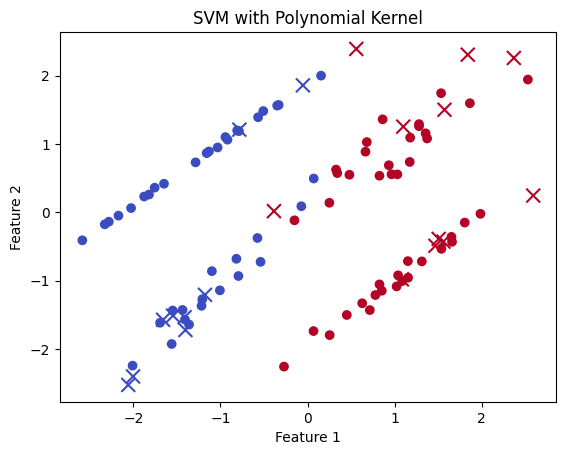

In [4]:
# Q2. How can we implement an SVM with a polynomial kernel in Python using Scikit-learn?

from sklearn.svm import SVC
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Generate sample data
X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, random_state=42)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train SVM with polynomial kernel
svm_classifier = SVC(kernel='poly', degree=3)  # You can adjust the degree as needed
svm_classifier.fit(X_train, y_train)

# Make predictions
y_pred = svm_classifier.predict(X_test)
print('score :',accuracy_score(y_test,y_pred))
# Visualize the results
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='coolwarm', marker='o')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, cmap='coolwarm', marker='x', s=100)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('SVM with Polynomial Kernel')
plt.show()


**Q3. How does increasing the value of epsilon affect the number of support vectors in SVR?**

In Support Vector Regression (SVR), the parameter epsilon (ε) plays a crucial role in defining the margin of tolerance around the regression line. It determines the width of the "epsilon-insensitive tube" within which errors are not penalized. The impact of increasing the value of epsilon on the number of support vectors in SVR can be understood as follows:

1. **Smaller Epsilon (Tighter Tube):**
   - With a smaller epsilon, the tolerance for errors becomes narrower.
   - The SVR algorithm becomes more stringent in fitting the data points to the regression line.
   - This leads to a higher number of support vectors, as the algorithm may need to consider more data points to fit the narrower epsilon-insensitive tube.

2. **Larger Epsilon (Wider Tube):**
   - Increasing the value of epsilon results in a wider tolerance for errors.
   - The SVR algorithm becomes more relaxed and allows for a larger margin of error around the regression line.
   - With a wider epsilon-insensitive tube, the algorithm may not need to consider as many data points to fit the model, leading to a smaller number of support vectors.

In summary, the relationship between the value of epsilon and the number of support vectors in SVR is inverse. As epsilon increases, the tolerance for errors increases, and the algorithm may not need to consider as many data points as support vectors. Conversely, with a smaller epsilon, the algorithm is stricter and requires more data points as support vectors to fit the data within the narrower tolerance. The choice of epsilon should be made considering the trade-off between model complexity (number of support vectors) and fitting accuracy.

**Q4. How does the choice of kernel function, C parameter, epsilon parameter, and gamma parameter affect the performance of Support Vector Regression (SVR)? Can you explain how each parameter works and provide examples of when you might want to increase or decrease its value?**

Certainly! The performance of Support Vector Regression (SVR) is influenced by several key parameters: the choice of kernel function, the C parameter, the epsilon (ε) parameter, and the gamma parameter. Let's delve into each parameter's role and how adjusting its value can impact SVR performance:

1. **Kernel Function:**
   The kernel function determines how SVR transforms the input data into a higher-dimensional space. Different kernel functions capture different types of relationships between data points. Common kernel functions include linear, polynomial, radial basis function (RBF), and sigmoid.

   - **Increasing Kernel Complexity:** If your data has complex non-linear relationships, using a more complex kernel like the polynomial or RBF kernel can capture intricate patterns.
   - **Decreasing Kernel Complexity:** For simpler relationships, a linear kernel might suffice, avoiding unnecessary computational overhead.

2. **C Parameter (Regularization):**
   The C parameter controls the trade-off between maximizing the margin and minimizing the errors. A smaller C allows for a wider margin and accepts more errors, while a larger C enforces a narrower margin with fewer errors.

   - **Increasing C:** Use a larger C when you want the SVR model to focus on fitting the training data closely, potentially at the cost of a narrower margin.
   - **Decreasing C:** Choose a smaller C to prioritize a wider margin and allow more errors while fitting the data.

3. **Epsilon (ε) Parameter:**
   The epsilon parameter defines the width of the epsilon-insensitive tube around the regression line. Data points within this tube are not penalized, while those outside it contribute to the loss.

   - **Increasing Epsilon:** Use a larger epsilon to allow more data points to lie within the tolerance zone. This can be useful when the data has inherent noise or outliers.
   - **Decreasing Epsilon:** Opt for a smaller epsilon when you want the model to closely adhere to the training data and be less tolerant of deviations.

4. **Gamma Parameter (RBF Kernel):**
   The gamma parameter controls the influence of individual data points in the RBF kernel. A higher gamma emphasizes points that are closer to the reference point, leading to more complex decision boundaries.

   - **Increasing Gamma:** Choose a higher gamma when you suspect that individual data points should have strong influence on the decision boundary, especially in complex, non-linear relationships.
   - **Decreasing Gamma:** Opt for a lower gamma to give more equal weight to all data points, which can be beneficial when you're dealing with less complex relationships.

In summary, the parameters in SVR interact in complex ways to shape the model's behavior. Their settings depend on your data's characteristics, the desired trade-off between fitting and generalization, and the complexity of relationships in your dataset. It's recommended to perform hyperparameter tuning using techniques like cross-validation to find the optimal parameter values that yield the best performance for your specific problem.

In [15]:
# Q5. Assignment:

#  Import the necessary libraries and load the dataset

from sklearn.datasets import load_breast_cancer
import pandas as pd

X=pd.DataFrame(dataset.data)
y=dataset.target
dataset=load_breast_cancer()
print(dataset.keys())
print(dataset.DESCR)

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these 

In [32]:
# Split the dataset into training and testing sets
 
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [33]:
# Preprocess the data using any technique of your choice (e.g. scaling, normaliMation)
 
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [34]:
# Create an instance of the SVC classifier and train it on the training data

from sklearn.svm import SVC

svc=SVC()
svc.fit(X_train,y_train)

SVC()

In [35]:
# use the trained classifier to predict the labels of the testing data

y_pred=svc.predict(X_test)

In [37]:
# Evaluate the performance of the classifier using any metric of your choice (e.g. accuracy,
# precision, recall, F1-score)

from sklearn.metrics import accuracy_score, classification_report

print('score :',accuracy_score(y_test,y_pred))
print("report :",classification_report(y_test,y_pred))

score : 0.9766081871345029
report :               precision    recall  f1-score   support

           0       0.97      0.97      0.97        63
           1       0.98      0.98      0.98       108

    accuracy                           0.98       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171



In [39]:
# Tune the hyperparameters of the SVC classifier using GridSearchCV or RandomiMedSearchCV to
# improve its performance
 
from sklearn.model_selection import GridSearchCV


param_grid={'C':[0.1,1,10,100,1000],
            'gamma':[1,0.1,0.01,0.001,0.0001],'kernel':['linear','poly']}
grid=GridSearchCV(SVC(),param_grid=param_grid,refit=True,cv=5,verbose=3)
grid.fit(X_train,y_train)


Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.975 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.975 total time=   0.0s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.988 total time=   0.0s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.975 total time=   0.0s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.962 total time=   0.0s
[CV 1/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.963 total time=   0.0s
[CV 2/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.963 total time=   0.0s
[CV 3/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.950 total time=   0.0s
[CV 4/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.949 total time=   0.0s
[CV 5/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.886 total time=   0.0s
[CV 1/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.975 total time=   0.0s
[CV 2/5] END ...C=0.1, gamma=0.1, kernel=linear

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear', 'poly']},
             verbose=3)

In [41]:
y_pred=grid.predict(X_test)
print('score:',accuracy_score(y_test,y_pred))
print(grid.best_params_)

score: 0.9824561403508771
{'C': 0.1, 'gamma': 1, 'kernel': 'linear'}


In [42]:
# Train the tuned classifier on the entire dataset

svc=SVC(C= 0.1, gamma= 1, kernel= 'linear')
svc.fit(X_train,y_train)

SVC(C=0.1, gamma=1, kernel='linear')

In [43]:
# Save the trained classifier to a file for future use.

import pickle

pickle.dump(scaler,open('breast_cancer_scaler.pkl','wb'))
pickle.dump(svc,open('breast_cancer_svc_model.pkl','wb'))

Note:You can use any dataset of your choice for this assignment, but make sure it is suitable for
classification and has a sufficient number of features and samples.